## À propos de ce tuto 

Ce tuto est une introduction pratique au machine learning, accessible aux débutants. 

Après une courte introduction au machine learning, vous apprendrez: 

* les principes de l'apprentissage supervisé pour la classification,
* comment installer la suite scientifique de python rapidement et sans effort,
* comment accéder à vos données d'entraînement et les valider,
* comment créer et entraîner votre premier réseau de neurones sur ces données,
* comment utiliser le réseau entraîné et tester ses performances.

#### Prérequis 

Nous allons travailler en python, un excellent choix pour l'analyse de données. Si vous ne connaissez pas python mais que avez fait un peu de C, de C++, ou de java par exemple, tout ira bien! C'est l'occasion idéale de découvrir python et, pourquoi pas, de tomber amoureux de ce langage comme des millions avant vous! 

En ce qui concerne les maths, vous devez juste savoir ce qu'est une probabilité. 


## Pourquoi le machine learning? 

Le machine learning (apprentissage machine) est un domaine de l'intelligence artificielle dans lequel on crée un système capable d'apprendre de manière autonome à partir d'un échantillon de données d'entraînement. Une fois l'entraînement réalisé, le système est utilisé pour effectuer des prédictions concernant de nouvelles données, jamais observées auparavant. 

Cette approche permet de résoudre des problèmes complexes, difficiles voire impossibles à traiter par une approche procédurale de la programmation. 

Il existe de nombreuses applications du machine learning: 

* pilotage automatique: 
    * véhicules autonomes: [Celle de google doit encore apprendre à rouler à droite sur l'autoroute](https://www.youtube.com/watch?v=TsaES--OTzM) ;-) 
    * stabilisation de drones: le pilote donne seulement des instructions simples (haut, bas, gauche, droit, ou juste des coordonnées 3D), et le drone réalise automatiquement les ajustements complexes nécessaires à sa stabilité, ou pour [voler en formation](https://www.youtube.com/watch?v=VnTQTm7vNbY)
    * [robots](https://www.youtube.com/watch?v=LikxFZZO2sk) 
* affaires: 
    * prédiction du prix d'un bien immobilier en fonction de variables comme la localisation du bien, le nombre de pièces, et même le texte de l'annonce immobilière.
    * prédiction de l'évolution du prix des actions pour le trading à haute fréquence
    * publicités google: prédiction de votre probabilité de cliquer sur une publicité, afin de vous envoyer les plus prometteuses. 
    * systèmes de recommendation: vous donner les vidéos youtube ou les chansons spotify que vous avez le plus de chances d'aimer
    * prédiction de votre probabilité d'avoir un accident de voiture, afin de moduler le montant de votre contrat d'assurance. 
    * identifier les personnes de votre liste d'emails qui sont les plus susceptibles d'acheter votre produit
    * identification des pièces présentant un défaut sur la chaîne de production
* santé (ou business?):
    * prédiction de la probabilité de développer un cancer en fonction de votre poids, de votre pression sanguine, de vos tests sanguins, du lieu où vous habitez, et de l'historique familial
* social: 
    * prédiction de vos opinions politiques en fonction des produits culturels que vous consommez et de votre activité sur les réseaux sociaux
    * identification de groupes de personnes de même opinion sur les réseaux sociaux, et des influenceurs les plus importants au sein de ces groupes.
* outils pour se simplifier la vie: 
    * catégorisation des photons (vous pouvez essayer de taper chat ou nourriture dans la boîte de recherche de votre bibliothèque google photos)
    * traduction automatique comme [google translate](https://translate.google.fr/?hl=en)
    * filtrage des pourriels
* art: 
    * génération automatique d'images: [deep dream](https://deepdreamgenerator.com/#gallery), [neural doodle](https://github.com/alexjc/neural-doodle)
    * composition de musique automatique
    
Cette liste pourrait pourrait continuer. 

Certaines de ces applications vont dans la bonne direction, et d'autres pourraient être extrêmement dangereuses en de mauvaises mains ou le sont même déjà. 

Une chose est claire: le machine learning est trop important pour être ignoré. 

## Machine learning pour la classification

Le but de ce tuto est de mettre directement et facilement la main à la pâte. Je ne vais donc pas vous ennuyer avec des concepts mathématiques compliqués, et me contenter de vous donner une explication simple des grands principes de l'apprentissage supervisé pour la classification. 

Il y aura un post plus détaillé par la suite au sujet du processus d'apprentissage.

![Supervised learning](https://github.com/cbernet/maldives/raw/master/handwritten_digits_sklearn/supervised_learning.png)

On donne au réseau une succession d'exemples d'entraînement. Chaque example comprend: 

* l'image d'un chiffre
* une étiquette, qui nous dit quel est le chiffre réellement représenté par l'image. L'étiquette pourrait avoir été renseignée par la personne qui à écrit ce chiffre. 

Dans le schéma ci-dessus, la première image est traitée par le réseau de neurone, qui nous dit que l'image est un 9. 

Au début du processus d'apprentissage, les connexions entre les neurones dans le réseau sont aléatoires, et le réseau n'est pas encore capable de se rendre utile en quoi que ce soit; il se contente de nous donner une réponse aléatoire. 

La réponse est comparée à l'étiquette. Dans ce cas, la réponse (9) est différente de l'étiquette (en fait, ce chiffre est un 3), et un retour est donné au réseau de neurones pour qu'il puisse s'améliorer. Les connexions entre les neurons sont modifiées, en favorisant celles qui tendent à donner une réponse correcte. 

Après la modification, les exemples suivants sont considérés, et le réseau apprend selon un processus itératif. 

Le nombre d'exemples nécessaires pour entraîner le réseau correctement peut être de l'ordre de quelques centaines pour des réseaux avec une architecture simple, ou de millions pour les réseaux complexes. 


## Installation de python et de sa librairie scientifique

**Si vous êtes déjà en train de faire tourner ce tuto dans un notebook jupyter, vous pouvez passer directement à la section suivante.**

Nous allons utiliser un ensemble d'outils venant de scipy, la librairie scientifique de python:

* **scikit-learn**: l'une des boîtes à outils les plus utilisées pour le machine learning en python. Il nous donnera un accès facile à l'échantillon de chiffres manuscrits, et nous permettra de définir et d'entraîner notre réseau en quelques lignes de code
* **numpy**: module central pour la manipulation de tableaux de données, tels que nos images de chiffres
* **matplotlib**: outils de visualisation, indispensables pour vérifier que tout va bien à toutes les étapes
* **jupyter**: server web qui vous permettra de suivre ce tuto et de faire tourner le code directement dans votre navigateur. 

Scipy est en fait plus qu'une simple librairie, mais un écosystème de modules python indépendants. 

Et en effet, il y a six ans, quand je démarrais avec scipy, j'ai essayé d'installer manuellement tous les modules dont j'avais besoin, pour la version de python qui était déjà en place sur mon système. 

Je passai presque une journée à me battre avec les dépendances entre les différents modules. Par exemple, scikit-learn avait besoin de numpy version A, mais pandas, lui, de la version B. Ou alors, l'un de ces modules ne pouvait fonctionner qu'avec une version de python plus récente que celle dont je disposais, ce qui voulait dire que j'allais devoir installer une nouvelle version de python sur mon système, puis gérer par la suite les deux version de python en parallèle. 

C'est là que j'ai découvert Anaconda.

Comme le dit le site web d'Anaconda: 

*Avec plus de 6 millions d'utilisateurs, la distribution open source Anaconda est le moyen le plus rapide et le plus facile de faire de la data science et du machine learning sous Linux, Windows, et Mac OS X. C'est le standard industriel pour le développement, le test, et l'entraînement sur une seule machine.*

En résumé, l'équipe d'Anaconda maintient un dépôt contenant plus de 1400 modules de data science, tous compatibles, et fournit des outils permettant d'installer une version de python ainsi que ces modules simplement, et en moins de cinq minutes. 

Et c'est exactement ce que nous allons faire maintenant!  

Tout d'abord, [téléchargez Anaconda](https://www.anaconda.com/download/) pour votre système: 

* Choisissez la version python 2.X, pas 3.X.
* Si vous utilisez Windows ou Linux, prenez garde à choisir l'outil d'installation 64 bits si vous avez un système 64 bits. 

Lancez l'outil d'installation et installez Anaconda. 

Finalement, lancez l'applications Anaconda Navigator. Sous Windows, vous pouvez la trouver en cliquant sur le menu démarrer, et en tapant anaconda. 

Dans la fenêtre de l'Anaconda Navigator, cliquez sur l'onglet Home, et démarrez le jupyter notebook. 

Vous devriez être redirigé vers une page du jupyter notebook dans votre navigateur. Nous allons maintenant tester cet outil. 

Créez un nouveau notebook. Dans le notebook, vous devriez voir une cellule vide, dans laquelle vous pouvez écrire du code python. Copiez-collez le code suivant dans cette cellule, et exécutez-la en pressant MAJ+entrée.

```python
print 'hello world!'
for i in range(10):
    print i
```

Une nouvelle cellule apparaît. Importez numpy et matplotlib (pensez bien à exécuter la cellule après avoir écrit le code):

```python
import matplotlib.pyplot as plt 
import numpy as np 
```

Ceci est la méthode standard pour importer ces modules:

* the module pyplot de matplotlib est maintenant appelé plt
* le module numpy est appelé np.

Vous auriez très bien pu choisir d'autres noms, mais comme ceux-là sont utilisés par quasiment tout le monde, il sera plus simple de les utiliser aussi.

Maintenant, essayons de faire notre premier graphique, histoire de vérifier que numpy et matplotlib fonctionnent:

```python
# création d'un tableau numpy à 1 dimension avec 16 valeurs entre 0 et 10
x = np.linspace(0, 3, 16)
print x 
# création d'un nouveau tableau à partir de x.
# x**2 retourne un tableau dans lequel chacun des éléments de x
# a été mis au carré.
y = x**2
print y
# tracé de y en fonction de x. 
# vous devriez obtenir une parabole. 
# vérifiez que pour x=1, on a bien y=1, et que pour x = 2, y = 4 
# plot y versus x, you should get a parabola. 
plt.plot(x, y)
```

--- 

**Petit avertissement:**

C'est assez facile de ce perdre dans la documentation de tous ces outils, et d'y perdre beaucoup de temps. 

Par exemple, si vous lisez la documentation de la méthode plt.plot (je ne vous donnerai pas le lien, mais vous pourriez le retrouver sur google ;-) ), you verrez qu'il y a de nombreuses façons de l'appeler, avec de nombreux paramètres optionnels. Mais après tout, nous avons seulement besoin de savoir que `plt.plot(x,y)` trace y en fonction de x!

Si vous souhaitez ne pas trop galérer, je vous conseille de suivre ce tutorial jusqu'au bout sans creuser plus loin. 

Ainsi, vous parviendrez à entraîner votre premier réseau de neurones facilement et ce faisant, vous vous familiariserez avec les outils les plus importants de scikit-learn, numpy, et matplotlib. Ce sera bien suffisant pour bon nombre de projets de machine learning, et vous pourrez toujours en apprendre plus par la suite quand cela deviendra nécessaire (vous le saurez!)

---

Maintenant que vous avez accès au notebook jupyter, j'ai une bonne nouvelle pour vous. Vous n'aurez pas à continuer à copier coller le code de cette page dans votre notebook. 

Faîtes plutôt la chose suivante:

* [téléchargez le dépôt contenant ce notebook](https://github.com/cbernet/maldives/archive/master.zip)
* décompressez-le, par exemple vers `Downloads/maldives-master`.
* lancez un jupyter notebook depuis l'Anaconda Navigator
* dans le notebook, naviguez vers `Downloads/maldives-master/handwritten_digits_sklearn
* et ouvrez `handwritten_digits_sklean_fr.ipynb`

Vous devriez voir cette page apparaître dans le notebook. À partir de maintenant, continuez le tutoriel dans le notebook. Vous devrez exécuter les cellules dans l'ordre. Vous pourrez même ajouter des cellules et modifier les cellules existantes pour expérimenter. 

## The digits dataset

scikit-learn comes with several test datasets. Let's load the handwritten digits dataset:

In [7]:
from sklearn import datasets
digits = datasets.load_digits()

In python, the `dir` function returns the names of the attributes of an object, in other words which information is stored in the object in the form of other objects. Let's use this function to check what can be found in the digits object:

In [4]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

Let's have a look in more details at some of these attributes. We are going to start by checking their type:

In [8]:
print type(digits.images)
print type(digits.target)

<type 'numpy.ndarray'>
<type 'numpy.ndarray'>


`images` and `target` are ndarrays (N-dimensional arrays) from the numpy package. The shape attribute of an ndarray gives the number of dimensions and the size along each dimension of the array. For example:

In [9]:
digits.images.shape

(1797, 8, 8)

digits.image is an array with 3 dimensions. The first dimension indexes images, and we see that we have 1797 images in total. The next two dimensions correspond to the x and y coordinates of the pixels in each image. Each image has 8x8 = 64 pixels. In other words, this array could be represented in 3D as a pile of images with 8x8 pixels each. 

let's look at the data of the first 8x8 image. Each slot in the array corresponds to a pixel, and the value in the slot is the amount of black in the pixel

In [10]:
print digits.images[0]

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


Now let's display this image: (sometimes, the plot does not appear, just rerun this cell if you don't see the image)

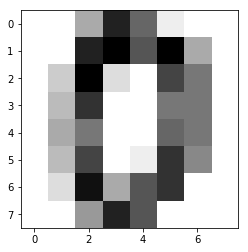

In [13]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[0],cmap='binary')

The image is low resolution. The original digits were of much higher resolution, and the resolution has been decreased when creating the dataset for scikit-learn to make it easier and faster to train a machine learning algorithm to recognize these digits. 

Now let's investigate the target attribute: 

In [14]:
print digits.target.shape
print digits.target

(1797,)
[0 1 2 ... 8 9 8]


It is a 1-dimensional array with 1797 slots. Looking into the array, we see that it contains the true numbers corresponding to each image. For example, the first target is 0, and corresponds to the image drawn just above. 

Let's have a look at some more images using this function: 

In [15]:
def plot_multi(i):
    '''Plots 16 digits, starting with digit i'''
    nplots = 16
    fig = plt.figure(figsize=(15,15))
    for j in range(nplots):
        plt.subplot(4,4,j+1)
        plt.imshow(digits.images[i+j], cmap='binary')
        plt.title(digits.target[i+j])
        plt.axis('off')
    plt.show()

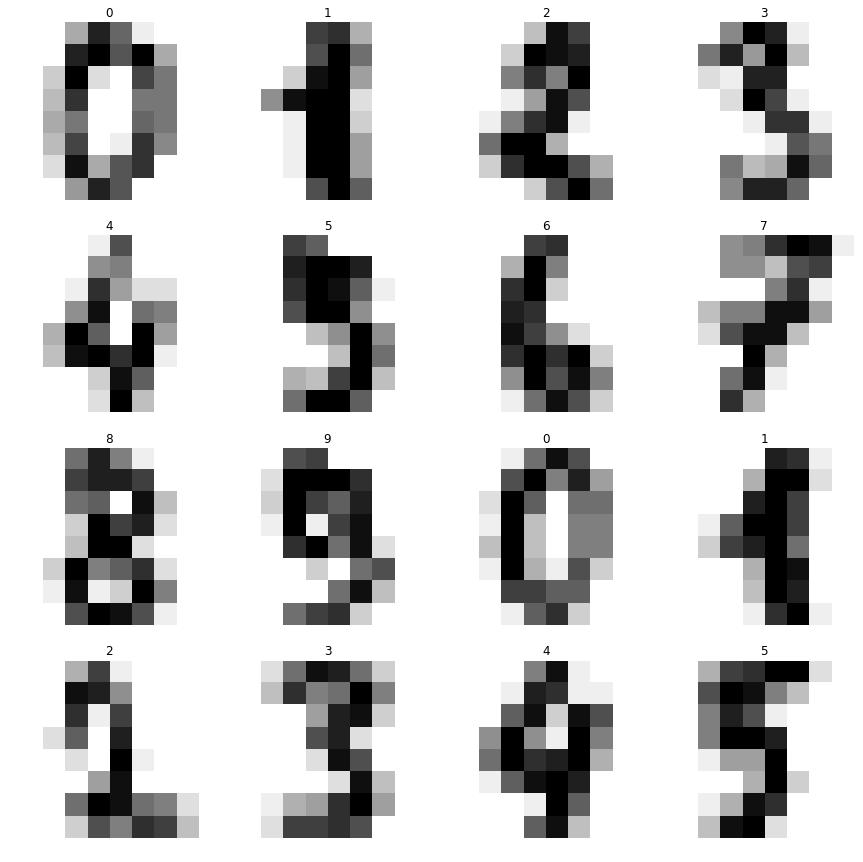

In [16]:
plot_multi(0)

you can have a look at the next digits by calling `plot_multi(16)`, `plot_multi(32)`, etc. You will probably see that with such a low resolution, it's quite difficult to recognize some of the digits, even for a human. In these conditions, our neural network will also be limited by the low quality of the input images. Can the neural network perform at least as well as a human? It would already be an achievement! 

## Building the network and preparing the input data

With [scikit-learn](https://scikit-learn.org), creating, training, and evaluating a neural network can be done with only a few lines of code. 

We will make a very simple neural network, with three layers: 

* an input layer, with one node per pixel in the input images
* a hidden layer with 15 neurons 
* an output layer with 10 neurons corresponding to our 10 classes of digits, from 0 to 9. 


The input layer requires a 1-dimensional array in input, but our images are 2D. So we need to flatten all images:

In [18]:
y = digits.target
x = digits.images.reshape((len(digits.images), -1))
x.shape

(1797, 64)

We now have 1797 flattened images. The two dimensions of our 8x8 images have been collapsed into a single dimension by  writing the rows of 8 pixels as they come, one after the other. The first image that we looked at earlier is now represented by a 1-D array with 8x8 = 64 slots. Please check that the values below are the same as in the original 2-D image. 

In [19]:
x[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

let's now split our data into a training sample and a testing sample:

In [20]:
x_train = x[:1000]
y_train = y[:1000]
x_test = x[1000:]
y_test = y[1000:]

The first 1000 images and labels are going to be used for training. The rest of the dataset will be used later to test the performance of our network. 

We can now create the neural network. We use one hidden layers with 15 neurons. The output layer must have exactly 10 neurons because we want to classify our digits in 10 categories. Don't pay attention to the other parameters, we'll cover that in future posts.

In [38]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(15,), activation='logistic', alpha=1e-4,
                    solver='sgd', tol=1e-4, random_state=1,
                    learning_rate_init=.1, verbose=True)
# this creates an output layer with 10 neurons:
mlp.classes_ = range(10)


Finally, we can train the MLP: 

In [39]:
mlp.fit(x_train,y_train)

Iteration 1, loss = 2.22958289
Iteration 2, loss = 1.91207743
Iteration 3, loss = 1.62507727
Iteration 4, loss = 1.32649842
Iteration 5, loss = 1.06100535
Iteration 6, loss = 0.83995513
Iteration 7, loss = 0.67806075
Iteration 8, loss = 0.55175832
Iteration 9, loss = 0.45840445
Iteration 10, loss = 0.39149735
Iteration 11, loss = 0.33676351
Iteration 12, loss = 0.29059880
Iteration 13, loss = 0.25437208
Iteration 14, loss = 0.22838372
Iteration 15, loss = 0.20200554
Iteration 16, loss = 0.18186565
Iteration 17, loss = 0.16461183
Iteration 18, loss = 0.14990228
Iteration 19, loss = 0.13892154
Iteration 20, loss = 0.12833784
Iteration 21, loss = 0.12138920
Iteration 22, loss = 0.11407971
Iteration 23, loss = 0.10677664
Iteration 24, loss = 0.10037149
Iteration 25, loss = 0.09593187
Iteration 26, loss = 0.09250135
Iteration 27, loss = 0.08676698
Iteration 28, loss = 0.08356043
Iteration 29, loss = 0.08209789
Iteration 30, loss = 0.07649168
Iteration 31, loss = 0.07410898
Iteration 32, los

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15,), learning_rate='constant',
       learning_rate_init=0.1, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=True,
       warm_start=False)

The training was extremely fast because the neural network is simple and the input dataset is small. Now that the MLP has been trained, let's see what it can say about our test images:

In [40]:
predictions = mlp.predict(x_test)
predictions[:50] # we just look at the 1st 50 examples in the training sample

array([1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5,
       4, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 3, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 5, 0])

These predictions should be fairly close to the targets of our training sample. Let's check by eye (please compare the values of these arrays)

In [41]:
y_test[:50] # true labels for the 1st 50 examples in the training sample

array([1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5,
       4, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0])

Not bad! we see that most (if not all) predictions match the true labels. 

But can we be a bit more quantitative? We can compute the accuracy of the classifier, which the probability for a digit to be classified in the right category. Again, scikit-learn comes with a handy tool to do that: 
    

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9159347553324969

This number is the probability for the digits in the test sample to be classified in the right category, meaning that we get 91.6% of the digits right, and 8.4% wrong. 

**We managed to get an 91.6% accuracy with this very simple neural network. Not too bad!**

However, this is only a first try. 

Actually, I must confess that I chose to use a simplistic network to keep the performance on the low side, so that we can optimize it later on. 

## Conclusion and outlook

In this hands-on tutorial, you have learned: 

* The principles of supervised machine learning for classification,
* How to install and use the scientific python suite for machine learning,
* How to investigate about your input dataset,
* How to train a neural network for image recognition, reaching an accuracy larger than 90% for digit classification.

It's only the beginning! In future posts we will: 

* see if we can optimize our network to further increase the accuracy,
* use deep learning (much more complex networks) to reach extreme accuracies,
* dive a bit more into the mechanism of the training to understand why we have created the MLP with these parameters.